## Observations and Insights 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# adding to starter
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [60]:
#mouse_metadata.head()

In [61]:
#study_results.head()

In [62]:
# Combine the data into a single dataset
merged_data_df = pd.DataFrame.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
merged_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [63]:
# Checking the number of mice.
mice_count = merged_data_df["Mouse ID"].nunique()
mice_count

249

In [64]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merged_data_df[merged_data_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [65]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_id = merged_data_df.loc[merged_data_df["Mouse ID"] == "g989"]
all_duplicate_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# drop Mouse ID g989
clean_data = merged_data_df[merged_data_df["Mouse ID"].isin(all_duplicate_id)==False]
clean_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [67]:
# Checking the number of mice in the clean DataFrame.
new_mice_count = clean_data["Mouse ID"].nunique()
new_mice_count

249

In [68]:
# check for duplicates in clean data
#check = clean_data.value_counts()
#check
#merged_data_df.drop_duplicates(keep=False, inplace=False)

## Summary Statistics

In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# view Drug Regimens we have
clean_data.value_counts(subset='Drug Regimen')

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
dtype: int64

In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# group by drug regimen first
regimen = clean_data.groupby("Drug Regimen")

# calculate summary statistics using the Tumor Volume (mm3) column
tv_mean = regimen["Tumor Volume (mm3)"].mean()
tv_median = regimen["Tumor Volume (mm3)"].median()
tv_variance = regimen["Tumor Volume (mm3)"].var()
tv_stddev = regimen["Tumor Volume (mm3)"].std()
tv_SEM = regimen["Tumor Volume (mm3)"].sem()
    # SEM = standard error of the mean

# create summary dataframe summary_df of the tumor volume for each regimen
tumor_volume_summary_df = pd.DataFrame({
    "Mean": tv_mean,
    "Median": tv_median,
    "Variance": tv_variance,
    "Standard Deviation": tv_stddev,
    "SEM": tv_SEM
})
tumor_volume_summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [71]:
# Using the aggregation method, produce the same summary statistics in a single line
# df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

agg_summary = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [72]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


# Filter the DataFrame down only to those columns to chart
drug_and_timepoint = clean_data[["Drug Regimen","Timepoint"]]

# Set the index to be Drug Regimen and groupby.
drug_and_timepoint = drug_and_timepoint.set_index("Drug Regimen")
drug_and_timepoint = drug_and_timepoint.groupby("Drug Regimen").count()
drug_and_timepoint

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


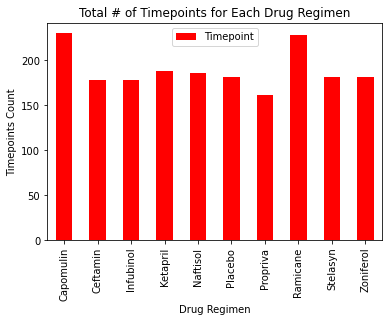

In [73]:
# Use Pandas to plot bar graph. Add title.
drug_and_timepoint.plot(kind="bar", facecolor="red")
plt.title("Total # of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints Count")  
plt.show()

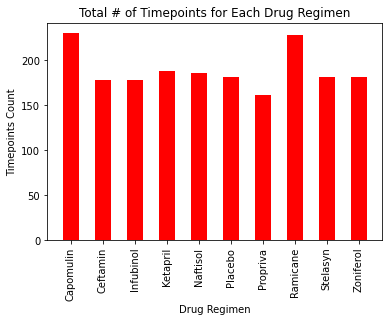

In [74]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# matplotlib.pyplot.bar() 

import numpy as np
# Set x axis and tick locations. Use the same df for Drug Regimen and Timepoints.
x_axis = np.arange(0, len(drug_and_timepoint))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

# Create list of labels and size
#plt.figure(figsize=(8,5))
plt.bar(x_axis, drug_and_timepoint["Timepoint"], color='red', width=0.5, align="center")
plt.xticks(tick_locations, drug_and_timepoint.index, rotation="vertical")
plt.title("Total # of Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints Count")  

# Save the figure

plt.show()

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Filter for the gender info into a new df
gender = clean_data.groupby("Sex")
gender_count = pd.DataFrame(gender["Mouse ID"].nunique())
gender_count.head()

,Mouse ID
Sex,
Female,124
Male,125


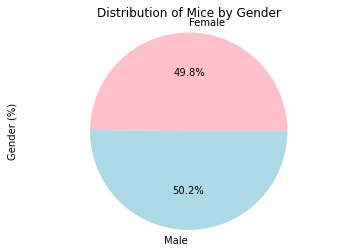

In [76]:
# Use pandas.DataFrame.plot() to plot pie chart
gender_pie = gender_count.plot(kind = "pie", y = "Mouse ID", colors = ["pink", "lightblue"], autopct="%1.1f%%", legend=False)
gender_pie.set_title("Distribution of Mice by Gender")
gender_pie.set_ylabel("Gender (%)")
plt.axis("equal")
plt.show()

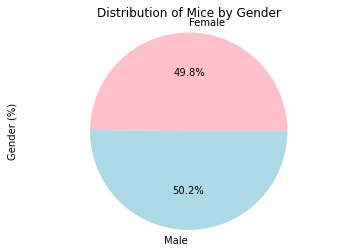

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#pie_labels = gender_count["Mouse ID"]
genderList = list(gender_count.index.values)
genderPie = gender_count['Mouse ID']

plt.pie(genderPie, labels=genderList, colors=["pink", "lightblue"], autopct="%1.1f%%")
plt.axis("equal")
plt.title("Distribution of Mice by Gender")
plt.ylabel("Gender (%)")
plt.show()

## Quartiles, Outliers and Boxplots

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#Rename max timepoint for clarity
max_tp = pd.DataFrame(clean_data.groupby(["Mouse ID"])["Timepoint"].max().sort_values()).reset_index().rename(columns={"Timepoint": "Max Timepoint"})

#max_tp = clean_data.groupby(["Mouse ID"])["Timepoint"].max()
#last_tp.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_tp = pd.merge(max_tp, clean_data, on=("Mouse ID"), how="right")
merged_tp.head()

,Mouse ID,Max Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,45,Ramicane,Male,21,16,0,45.000000,0
1,k403,45,Ramicane,Male,21,16,5,38.825898,0
2,k403,45,Ramicane,Male,21,16,10,35.014271,1
3,k403,45,Ramicane,Male,21,16,15,34.223992,1
4,k403,45,Ramicane,Male,21,16,20,32.997729,1


In [79]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_finalVol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    quartiles = merged_tp[merged_tp['Drug Regimen']==drug]['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25] # bottom of the box
    upperq = quartiles[0.75] # top of the box
    iqr = upperq - lowerq    # range of values in the box
    
    # Locate the rows which contain mice on each drug and get the tumor volumes #use loc
    mice = merged_tp.loc[merged_tp['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_finalVol.append(mice)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr) # bottom whisker
    upper_bound = upperq + (1.5*iqr) # upper whisker
    outliers = merged_tp[(merged_tp['Tumor Volume (mm3)']<lower_bound)|(merged_tp['Tumor Volume (mm3)']>upper_bound)]['Tumor Volume (mm3)']
    
    # Use print statements to get info for each drug. Use a counter to iterate through.
    counter = 0
    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 37.685932865
The upper quartile of Capomulin is: 45.0
The interquartile range of Capomulin is: 7.314067135000002
The the median of Capomulin is: 41.557808879999996 
Values below 26.714832162499995 for Capomulin could be outliers.
Values above 55.9711007025 for Capomulin could be outliers.
--------------------------------------------------------
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 36.674634585
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.325365415
The the median of Ramicane is: 40.67323554 
Values below 24.1865864625 for Ramicane could be outliers.
Values above 57.488048122500004 for Ramicane could be outliers.
--------------------------------------------------------
--------------------------------------------------------
Infubinol IQR data is:
The lower quar

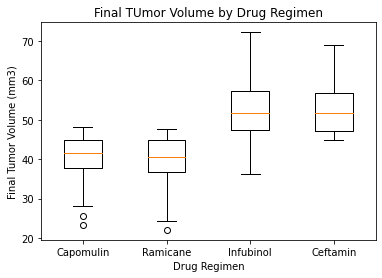

In [80]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1,ax1 = plt.subplots()
ax1.boxplot(tumor_finalVol)

ax1.set_title('Final TUmor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
plt.xticks([1,2,3,4], treatments) #set labels to treatments in order 

plt.show()

## Line and Scatter Plots

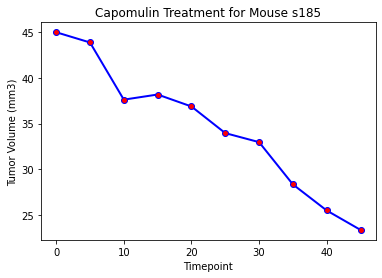

In [81]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Find Mouse ID treated with Capomulin
cap_df = pd.DataFrame(merged_tp[merged_tp['Drug Regimen']=='Capomulin'])
#cap_df

# Use Mouse ID 's185' for line plot
selected_id = cap_df.loc[cap_df['Mouse ID']=='s185']
#selected_id

x_timepoint = selected_id["Timepoint"]
y_tumor_volume = selected_id["Tumor Volume (mm3)"]
plt.plot(x_timepoint, y_tumor_volume, color = "blue", marker = "o", markerfacecolor = "red", linewidth = 2)
plt.title(f"Capomulin Treatment for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

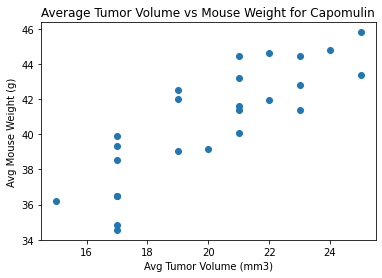

In [88]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#cap_df = pd.DataFrame(merged_tp[merged_tp['Drug Regimen']=='Capomulin'])
#use cap_df from above to groupby tumor volume & mouse weight with mean()
cap_volume_avg = cap_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
cap_weight_avg = cap_df.groupby(['Mouse ID'])['Weight (g)'].mean()

plt.scatter(cap_weight_avg,cap_volume_avg)
plt.xlabel('Avg Tumor Volume (mm3)')
plt.ylabel('Avg Mouse Weight (g)')
plt.title('Average Tumor Volume vs Mouse Weight for Capomulin')

plt.show()

## Correlation and Regression

In [94]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_weight_avg
y_values = cap_volume_avg

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


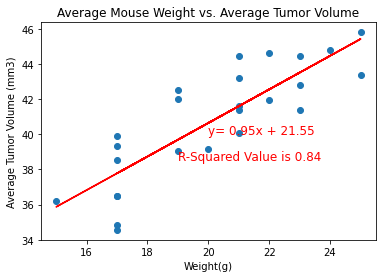

In [95]:
# calculate linear regression
slope, y_int, r_value, p_value, std_err = st.linregress(x_values, y_values)

fit = x_values * slope  + y_int #line of best fit
equation = "y= " + str(round(slope,2)) + "x + " + str(round(y_int,2))
#r_square = "R-Squared Value is " + str(round(r_value,2))

# use same scatter plot as above
plt.scatter(x_values, y_values)
plt.plot(x_values, fit, color = "red")
plt.annotate(equation, (20, 40), color = "red", fontsize = 12)
plt.annotate(r_square, (19, 38.5), color = "red", fontsize = 12)


plt.title("Average Mouse Weight vs. Average Tumor Volume")
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()